Exploratory Data Analysis & Intro

Goal

1. Investigate top-paying roles and skills in the data science industry.
2. Use Python to explore a real-live dataset on job postings.
3. For job-seekers: use these insights to help find the best job opportunities.

Final Deliverables:

* Create Jupyter Notebookss (showcasing core skills in Python).
* Create a summary page (via README.md) capturing your findings.
* Share this project via GitHub & Linkedin
 

In [ ]:
#importing libraries
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset


# loading Data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

#Data Cleanup
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df['job_skills']  = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [8]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')]

df_plot = df_DA_US['job_location'].value_counts().head(10).to_frame()

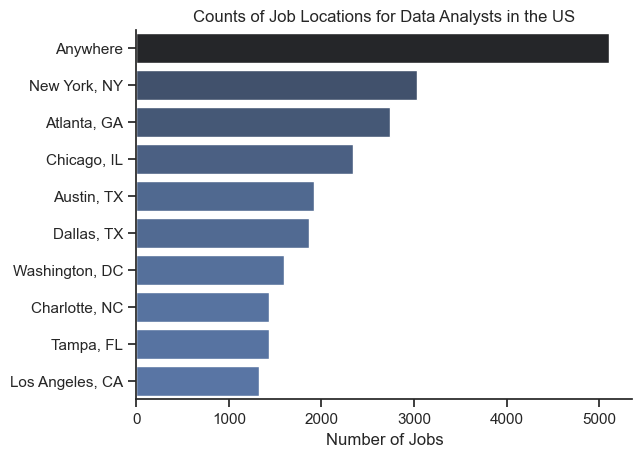

In [26]:
sns.set_theme(style="ticks")
sns.barplot(data=df_plot, y='job_location', x='count', hue='count', palette = 'dark:b_r', legend=False)
sns.despine()
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.title('Counts of Job Locations for Data Analysts in the US')
plt.show()

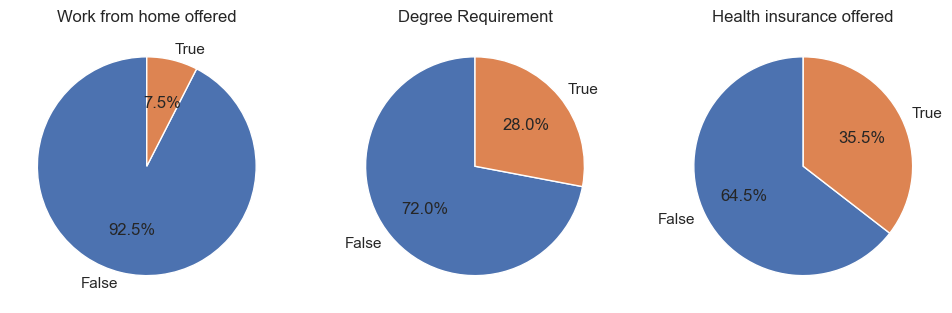

In [28]:
# fig, ax = plt.subplots(1, len(dict_column))

dict_column = {
    'job_work_from_home': 'Work from home offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health insurance offered'
}

fig, ax = plt.subplots(1, 3)
fig.set_size_inches(12, 5)

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA_US[column].value_counts(), startangle=90, autopct='%1.1f%%', labels=['False', 'True'])
    ax[i].set_title(title)

plt.show()

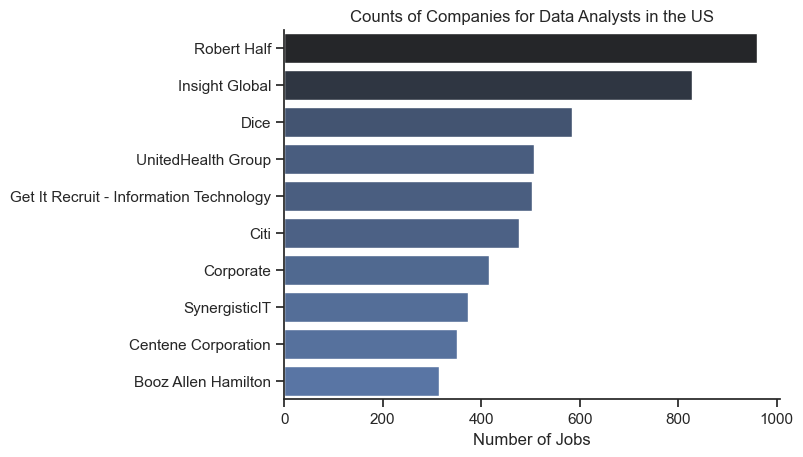

In [30]:
df_plot = df_DA_US['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style="ticks")
sns.barplot(data=df_plot, y='company_name', x='count', hue='count', palette = 'dark:b_r', legend=False)
sns.despine()
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.title('Counts of Companies for Data Analysts in the US')
plt.show()